In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [95]:
loan_df = pd.read_csv('/home/student/application_train.csv', nrows=10000)

In [96]:
loan_df.head()# Check if 'contract_type' column is present
if 'contract_type' in X_train.columns:
    from category_encoders import BinaryEncoder

    # Apply binary encoding only to the 'contract_type' column
    encoder = BinaryEncoder(cols=['contract_type'], return_df=True)

    # Fit and transform the training set
    X_train_encoded = encoder.fit_transform(X_train)

    # Transform the test set using the same encoder
    X_test_encoded = encoder.transform(X_test)

    print(X_train_encoded.head())
else:
    print("Column 'contract_type' not found in X_train.")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Visualize the distribution of loan approvals and rejection

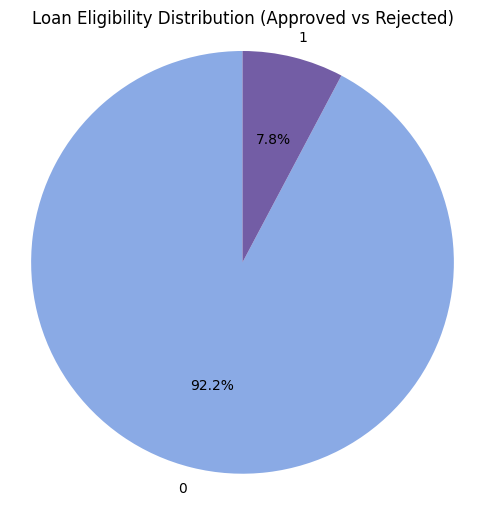

In [97]:
# Count the number of positive and negative sentiments
eligibility_counts = loan_df['TARGET'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(eligibility_counts, labels=eligibility_counts.index, autopct='%1.1f%%', colors=['#8AAAE5', '#735DA5'], startangle=90)
plt.title('Loan Eligibility Distribution (Approved vs Rejected)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Data Cleaning

In [98]:
loan_df = loan_df.drop(['SK_ID_CURR','OCCUPATION_TYPE'], axis=1)

##### Convert all text to lowercase to ensure uniformity 

### Removing leading and trailing white spaces(Strip())
#### This code snippet covers all the columns in your dataset, ensuring any leading or trailing whitespace is removed.
Pandas provides the predefined method pandas.Series.str.strip() to remove whitespace from strings. This function effectively removes both leading and trailing whitespace from the specified columns.

In [99]:
loan_df['TARGET'] = loan_df['TARGET'].astype(str).str.strip()  # Convert to str if needed
loan_df['NAME_CONTRACT_TYPE'] = loan_df['NAME_CONTRACT_TYPE'].str.strip()
loan_df['CODE_GENDER'] = loan_df['CODE_GENDER'].str.strip()
loan_df['FLAG_OWN_CAR'] = loan_df['FLAG_OWN_CAR'].str.strip()
loan_df['FLAG_OWN_REALTY'] = loan_df['FLAG_OWN_REALTY'].str.strip()
loan_df['CNT_CHILDREN'] = loan_df['CNT_CHILDREN'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_INCOME_TOTAL'] = loan_df['AMT_INCOME_TOTAL'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_CREDIT'] = loan_df['AMT_CREDIT'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_ANNUITY'] = loan_df['AMT_ANNUITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['AMT_GOODS_PRICE'] = loan_df['AMT_GOODS_PRICE'].astype(str).str.strip()  # Convert to str if needed
loan_df['NAME_TYPE_SUITE'] = loan_df['NAME_TYPE_SUITE'].str.strip()
loan_df['NAME_INCOME_TYPE'] = loan_df['NAME_INCOME_TYPE'].str.strip()
loan_df['NAME_EDUCATION_TYPE'] = loan_df['NAME_EDUCATION_TYPE'].str.strip()
loan_df['NAME_FAMILY_STATUS'] = loan_df['NAME_FAMILY_STATUS'].str.strip()
loan_df['NAME_HOUSING_TYPE'] = loan_df['NAME_HOUSING_TYPE'].str.strip()
loan_df['REGION_POPULATION_RELATIVE'] = loan_df['REGION_POPULATION_RELATIVE'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_BIRTH'] = loan_df['DAYS_BIRTH'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_EMPLOYED'] = loan_df['DAYS_EMPLOYED'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_REGISTRATION'] = loan_df['DAYS_REGISTRATION'].astype(str).str.strip()  # Convert to str if needed
loan_df['DAYS_ID_PUBLISH'] = loan_df['DAYS_ID_PUBLISH'].astype(str).str.strip()  # Convert to str if needed
loan_df['OWN_CAR_AGE'] = loan_df['OWN_CAR_AGE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_MOBIL'] = loan_df['FLAG_MOBIL'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_EMP_PHONE'] = loan_df['FLAG_EMP_PHONE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_WORK_PHONE'] = loan_df['FLAG_WORK_PHONE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_CONT_MOBILE'] = loan_df['FLAG_CONT_MOBILE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_PHONE'] = loan_df['FLAG_PHONE'].astype(str).str.strip()  # Convert to str if needed
loan_df['FLAG_EMAIL'] = loan_df['FLAG_EMAIL'].astype(str).str.strip()  # Convert to str if needed
loan_df['CNT_FAM_MEMBERS'] = loan_df['CNT_FAM_MEMBERS'].astype(str).str.strip()  # Convert to str if needed
loan_df['REGION_RATING_CLIENT'] = loan_df['REGION_RATING_CLIENT'].astype(str).str.strip()  # Convert to str if needed
loan_df['REGION_RATING_CLIENT_W_CITY'] = loan_df['REGION_RATING_CLIENT_W_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['WEEKDAY_APPR_PROCESS_START'] = loan_df['WEEKDAY_APPR_PROCESS_START'].str.strip()
loan_df['HOUR_APPR_PROCESS_START'] = loan_df['HOUR_APPR_PROCESS_START'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_REGION_NOT_LIVE_REGION'] = loan_df['REG_REGION_NOT_LIVE_REGION'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_REGION_NOT_WORK_REGION'] = loan_df['REG_REGION_NOT_WORK_REGION'].astype(str).str.strip()  # Convert to str if needed
loan_df['LIVE_REGION_NOT_WORK_REGION'] = loan_df['LIVE_REGION_NOT_WORK_REGION'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_CITY_NOT_LIVE_CITY'] = loan_df['REG_CITY_NOT_LIVE_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['REG_CITY_NOT_WORK_CITY'] = loan_df['REG_CITY_NOT_WORK_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['LIVE_CITY_NOT_WORK_CITY'] = loan_df['LIVE_CITY_NOT_WORK_CITY'].astype(str).str.strip()  # Convert to str if needed
loan_df['ORGANIZATION_TYPE'] = loan_df['ORGANIZATION_TYPE'].str.strip()
loan_df['EXT_SOURCE_1'] = loan_df['EXT_SOURCE_1'].astype(str).str.strip()  # Convert to str if needed
loan_df['EXT_SOURCE_2'] = loan_df['EXT_SOURCE_2'].astype(str).str.strip()  # Convert to str if needed
loan_df['EXT_SOURCE_3'] = loan_df['EXT_SOURCE_3'].astype(str).str.strip()  # Convert to str if needed

#### Removing HTML Tags
This code snippet is designed to remove HTML tags from the string values in all columns of a pandas DataFrame (loan_df). The code uses a regular expression (regex) to identify and eliminate any HTML tags present in the data.

In [100]:
import re

# Function to remove HTML tags
def remove_html_tags(text):
    if isinstance(text, str):  # Check if the value is a string
        return re.sub(r'<.*?>', '', text)
    return text  # Return the original value if it's not a string

# Apply the function to all columns
for column in loan_df.columns:
    loan_df[column] = loan_df[column].apply(remove_html_tags)

# print(loan_df)

#### Converting the values in categorical columns into lowercase
This code snippet is designed to convert the values of specified categorical columns in a pandas DataFrame (loan_df) to lowercase. This standardization can help ensure consistency in the data, particularly when analyzing or processing text data.

In [101]:
# List of categorical columns
categorical_columns = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START',
]

# Convert all categorical columns to lowercase
for column in categorical_columns:
    loan_df[column] = loan_df[column].str.lower()
# Display the first few rows to confirm the changes
# print(loan_df.head())

## Cleaning the numerical columns

In [102]:
print(loan_df[['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3']].dtypes)

OWN_CAR_AGE     object
EXT_SOURCE_1    object
EXT_SOURCE_3    object
dtype: object


In [103]:
# Identify numeric columns
numeric_cols = loan_df.select_dtypes(include=['number']).columns

# Fill NaN values with the 25th percentile for each numeric column
for col in numeric_cols:
    percentile_25 = loan_df[col].quantile(0.25)
    loan_df[col] = loan_df[col].fillna(percentile_25)

# Check the DataFrame for null values
print(loan_df.isnull().sum())

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 120, dtype: int64


In [117]:
# Display only columns with null values
null_counts = loan_df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


In [105]:
import pandas as pd

# Sample loading of loan_df (you'll replace this with your actual DataFrame)
# loan_df = pd.read_csv('your_file.csv')

# Check the data type of AMT_INCOME_TOTAL
print("Data type before conversion:", loan_df['AMT_INCOME_TOTAL'].dtype)

# Convert AMT_INCOME_TOTAL to numeric, coercing errors to NaN
loan_df['AMT_INCOME_TOTAL'] = pd.to_numeric(loan_df['AMT_INCOME_TOTAL'], errors='coerce')

# Check for remaining null values after conversion
print("Null values after conversion:", loan_df['AMT_INCOME_TOTAL'].isnull().sum())

# Fill missing values with the 25th percentile if there are any NaNs left
if loan_df['AMT_INCOME_TOTAL'].isnull().sum() > 0:
    quantile_25 = loan_df['AMT_INCOME_TOTAL'].quantile(0.25)
    loan_df['AMT_INCOME_TOTAL'] = loan_df['AMT_INCOME_TOTAL'].fillna(quantile_25)

# Final check for any remaining null values
print("Remaining null values:", loan_df['AMT_INCOME_TOTAL'].isnull().sum())

# Verify the data type after filling
print("Data type after conversion and filling:", loan_df['AMT_INCOME_TOTAL'].dtype)


Data type before conversion: object
Null values after conversion: 0
Remaining null values: 0
Data type after conversion and filling: float64


In [106]:
loan_df['NAME_TYPE_SUITE'] = loan_df.groupby(['NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])['NAME_TYPE_SUITE'].transform(lambda x: x.ffill().bfill())

In [112]:
# Fill missing values in 'HOUSETYPE_MODE' using forward fill and backward fill
loan_df['HOUSETYPE_MODE'] = (
    loan_df.groupby(['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE'])['HOUSETYPE_MODE']
    .transform(lambda x: x.ffill().bfill())
)

# Convert to string type to avoid downcasting issues
loan_df['HOUSETYPE_MODE'] = loan_df['HOUSETYPE_MODE'].astype(str)

# Check for null values to confirm filling
print(loan_df['HOUSETYPE_MODE'].isnull().sum())

0


In [113]:
loan_df['WALLSMATERIAL_MODE'] = loan_df['WALLSMATERIAL_MODE'].fillna(loan_df['WALLSMATERIAL_MODE'].mode()[0])

In [114]:
import pandas as pd

# Fill missing values in 'EMERGENCYSTATE_MODE' using forward fill and backward fill
loan_df['EMERGENCYSTATE_MODE'] = (
    loan_df.groupby(['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE'])['EMERGENCYSTATE_MODE']
    .transform(lambda x: x.ffill().bfill())
)

# Convert to string type to avoid downcasting issues
loan_df['EMERGENCYSTATE_MODE'] = loan_df['EMERGENCYSTATE_MODE'].astype(str)

# Check for null values to confirm filling
print(loan_df['EMERGENCYSTATE_MODE'].isnull().sum())

0


In [116]:
loan_df['FONDKAPREMONT_MODE'] = (
    loan_df.groupby(['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE'])['FONDKAPREMONT_MODE']
    .transform(lambda x: x.ffill().bfill())
)

# Convert to string type to avoid downcasting issues
loan_df['FONDKAPREMONT_MODE'] = loan_df['FONDKAPREMONT_MODE'].astype(str)

# Check for null values to confirm filling
print(loan_df['FONDKAPREMONT_MODE'].isnull().sum())

0


## Renaming the columns

In [118]:
loan_df.rename(columns={
    'TARGET':'target',
    'AMT_ANNUITY': 'loan_annuity',
    'AMT_GOODS_PRICE': 'goods_price',
    'AMT_INCOME_TOTAL': 'total_income',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'credit_inquiries_last_year',
    'AMT_REQ_CREDIT_BUREAU_MON': 'credit_inquiries_last_month',
    'DAYS_BIRTH': 'applicant_age',
    'NAME_CONTRACT_TYPE': 'contract_type',
    'DAYS_EMPLOYED': 'employment_duration',
    'OCCUPATION_TYPE': 'occupation',
    'NAME_INCOME_TYPE': 'income_source',
    'NAME_EDUCATION_TYPE': 'education_level',
    'CNT_CHILDREN': 'num_children',
    'CNT_FAM_MEMBERS': 'num_family_members',
    'NAME_FAMILY_STATUS': 'family_status',
    'EXT_SOURCE_1': 'external_score_1',
    'EXT_SOURCE_2': 'external_score_2',
    'EXT_SOURCE_3': 'external_score_3',
    'FLAG_OWN_CAR': 'owns_car',
    'FLAG_OWN_REALTY': 'owns_realty',
    'OWN_CAR_AGE': 'car_age',
    'REGION_POPULATION_RELATIVE': 'region_population_relative',
    'DAYS_LAST_PHONE_CHANGE': 'days_since_last_phone_change',
    'FLAG_WORK_PHONE': 'has_work_phone',
    'FLAG_PHONE': 'has_phone',
    'FLAG_EMAIL': 'has_email',
    'DAYS_ID_PUBLISH': 'days_since_id_published',
    'DAYS_REGISTRATION': 'days_since_registration',
    'REG_REGION_NOT_LIVE_REGION': 'different_residence_region',
    'REG_CITY_NOT_LIVE_CITY': 'different_residence_city'
}, inplace=True)

print(loan_df.columns)

Index(['target', 'contract_type', 'CODE_GENDER', 'owns_car', 'owns_realty',
       'num_children', 'total_income', 'AMT_CREDIT', 'loan_annuity',
       'goods_price',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'credit_inquiries_last_month', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'credit_inquiries_last_year'],
      dtype='object', length=120)


### Removing Emojis

In [119]:
# Function to remove emojis and emoticons
def remove_emojis(text):
    return text.str.replace(r'[:;=][)(DP]', '', regex=True)

# Apply to all string columns in the entire DataFrame
for col in loan_df.select_dtypes(include=['object']):
    loan_df[col] = remove_emojis(loan_df[col])

# Display the updated DataFrame
# print(loan_df)

### Cleaning numetrical columns

In [120]:
loan_df['total_income'] = pd.to_numeric(loan_df['total_income'], errors='coerce')
loan_df['loan_annuity'] = pd.to_numeric(loan_df['loan_annuity'], errors='coerce')
loan_df['goods_price'] = pd.to_numeric(loan_df['goods_price'], errors='coerce')

In [123]:
print(loan_df[['total_income', 'loan_annuity', 'goods_price']].isnull().sum())

total_income    0
loan_annuity    0
goods_price     0
dtype: int64


In [122]:
loan_df['goods_price'] = loan_df.groupby(['total_income', 'contract_type'])['goods_price'].transform(lambda x: x.ffill().bfill())

In [23]:
Q1 = loan_df[['total_income', 'loan_annuity', 'goods_price']].quantile(0.25)
Q3 = loan_df[['total_income', 'loan_annuity', 'goods_price']].quantile(0.75)
IQR = Q3 - Q1

loan_df = loan_df[~((loan_df[['total_income', 'loan_annuity', 'goods_price']] < (Q1 - 1.5 * IQR)) | (loan_df[['total_income', 'loan_annuity', 'goods_price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Standardize Numerical Features
Numerical features may vary widely in scale, which can affect the performance of machine learning algorithms.

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
loan_df.loc[:, ['total_income', 'loan_annuity', 'goods_price']] = scaler.fit_transform(loan_df[['total_income', 'loan_annuity', 'goods_price']])

In [25]:
# loan_df[['total_income', 'loan_annuity', 'goods_price']] = scaler.fit_transform(loan_df[['total_income', 'loan_annuity', 'goods_price']])

### Handling Skewed Data
np.where(condition, value_if_true, value_if_false): This function checks if the condition is met (in this case, if total_income is greater than 0). If true, it applies np.log1p(), otherwise, it sets the value to NaN.
This way, you handle non-positive values and apply the transformation in one line, keeping the code concise and easy to read.<br>

Reduces Skewness: Many datasets, especially those involving income or prices, can be right-skewed. Applying a log transformation helps make the distribution more normal, which is a common assumption in many models.

In [126]:
# Ensure total_income is numeric and handle any potential issues
loan_df.loc[:, 'total_income'] = pd.to_numeric(loan_df['total_income'], errors='coerce')

# Replace negative values with NaN (if you don't want to log-transform them)
loan_df.loc[loan_df['total_income'] < 0, 'total_income'] = np.nan

# Apply log1p safely
loan_df.loc[:, 'total_income'] = np.where(
    loan_df['total_income'] > 0,
    np.log1p(loan_df['total_income']),
    np.nan
)

## Converting the date of birth and the employment duration from days to years

In [128]:
# Step 1: Convert to numeric using .loc
loan_df.loc[:, 'employment_duration'] = pd.to_numeric(loan_df['employment_duration'], errors='coerce')

# Step 3: Convert days to years and round
loan_df.loc[:, 'employment_duration'] = abs(loan_df['employment_duration']) / 365.25

# Step 4: Explicitly cast to int
loan_df.loc[:, 'employment_duration'] = loan_df['employment_duration'].round(0).astype(int)

In [129]:

# Step 1: Convert to numeric using .loc
loan_df.loc[:, 'applicant_age'] = pd.to_numeric(loan_df['applicant_age'], errors='coerce')

# Step 3: Convert days to years and round
loan_df.loc[:, 'applicant_age'] = abs(loan_df['applicant_age']) / 365.25

# Step 4: Explicitly cast to int
loan_df.loc[:, 'applicant_age'] = loan_df['applicant_age'].round(0).astype(int)

# Feature Engineering
### Frequency Encoding
It helps mitigate overfitting, since it reduces the number of new columns created compared to one-hot encoding.<br>

For categorical features with many unique values (high cardinality), frequency encoding reduces dimensionality by not creating a separate binary feature for each category (as in one-hot encoding).<br>

Frequency encoding is a technique used in feature engineering to convert categorical variables into numerical representations based on the frequency of each category

In [130]:
# Split the data into features and target
X = loan_df.drop(columns=['target'])
y = loan_df['target']

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [134]:
import pandas as pd

# Assuming X_train and X_test are your training and testing DataFrames

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Initialize dictionaries to hold frequency-encoded columns
train_freq_cols = {}
test_freq_cols = {}

# Apply frequency encoding for each categorical column
for col in categorical_cols:
    # Frequency encoding based on the training data
    freq_encoding = X_train[col].value_counts()
    
    # Create new frequency-encoded columns for train and test
    train_freq_cols[col + '_freq'] = X_train[col].map(freq_encoding)
    test_freq_cols[col + '_freq'] = X_test[col].map(freq_encoding)

# Convert dictionaries to DataFrames
train_freq_df = pd.DataFrame(train_freq_cols)
test_freq_df = pd.DataFrame(test_freq_cols)

# Concatenate frequency-encoded columns with the original DataFrames
X_train = pd.concat([X_train, train_freq_df], axis=1)
X_test = pd.concat([X_test, test_freq_df], axis=1)

# Optionally, you can drop the original categorical columns if you no longer need them
X_train = X_train.drop(columns=categorical_cols)
X_test = X_test.drop(columns=categorical_cols)

# Check the updated DataFrames
# print(X_train.head())
# print(X_test.head())

In [135]:
# List of numerical columns to standardize
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [136]:
# Standardize the numerical columns for both training and test sets
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Model Training
### LogisticRegression